# Model de predictie multiparametru

Modelul nostru citeste un fisier Excel si imparte datele de intrare in elemente de intrare si elemente de iesire. Elementele de intrare au 24 de caracteristici pe care le urmeaza.

In [111]:
import pandas as pd
df = pd.read_excel(r'Copy of Extraction PT4 14x59 din 2016 pana in prezent - analysis S1928 (003).xlsx', sheet_name='TL4 -40 Nm' )
dataset = df.values

X = dataset[1:,23:45]
Y = dataset[1:,14]
X = X.astype('float')
Y = Y.astype('float')
print("X:  %s, Y: %s" % (X.shape, Y.shape))

X:  (918, 22), Y: (918,)


### Normalizarea datelor
Este necesara extragerea din dataset a valorilor de intrare care au valoare NaN.
De asemenea, am ignorat parametrii care nu varieaza in dataset.

In [112]:
Xdf = pd.DataFrame(X)
Ydf = pd.DataFrame(Y)
tdat = Xdf
tdat[22] = Ydf[0]
tdat.dropna(inplace=True)
td = tdat.values
X = td[1:, 0:21]
Y = td[1:, 22]
X = X.astype('float')
Y = Y.astype('float')
X.shape, Y.shape

((910, 21), (910,))

## Scalam datele de intrare si de iesire intre valorile 0 si 1
pentru aceasta apelam la minmaxscaller din pachetul scipy

In [113]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale.shape

(910, 21)

In [114]:
d1 = pd.DataFrame(X_scale)
d1.dropna(inplace=True)
d1.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

## Impartim datele in data de training si date de test

folosind regula 2/3 vs 1/3

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)

X_test, Y_test

(637, 21)
(136, 21)
(137, 21)
(637,)
(136,)


(array([[0.48051948, 0.20967742, 0.41176471, ..., 0.5       , 0.125     ,
         0.19767442],
        [0.48051948, 0.24193548, 0.58823529, ..., 0.6       , 0.25      ,
         0.12790698],
        [0.42857143, 0.19354839, 0.70588235, ..., 0.5       , 0.125     ,
         0.39534884],
        ...,
        [0.32467532, 0.33870968, 0.35294118, ..., 0.4       , 0.125     ,
         0.48837209],
        [0.36363636, 0.12903226, 0.58823529, ..., 0.3       , 0.125     ,
         0.51162791],
        [0.05194805, 0.25806452, 0.70588235, ..., 0.4       , 0.25      ,
         0.31395349]]),
 array([ 5.01,  7.13,  8.46, 11.41, 14.95,  7.84, 15.8 , 11.  , 14.73,
         7.47,  8.  , 11.6 , 10.83, 11.44,  6.  , 15.77,  5.  ,  6.13,
        12.76,  8.64,  4.  , 10.84, 10.22, 10.08,  9.44, 12.88,  7.24,
        12.  , 12.75, 12.31,  1.19, 11.  ,  9.34, 11.  ,  5.34,  7.54,
        13.27,  3.58, 10.48,  9.1 ,  9.  ,  9.18,  4.98,  8.  , 13.85,
         8.22,  6.67,  5.  , 12.12, 10.27, 13.91, 13.4

## Cream modelul ML
1 strat de intrare de dimensiunea dictata de numarul de parametrii folositi (22)

1 strat ascuns dim 77 folosind modelul de activare ReLU

1 strat ascuns dim 77 folosind modelul de activare ReLU

1 strat de iesire dim 1 folosind un model de activare de tip sigmoid



In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
model = Sequential([
    Dense(77, activation='relu', kernel_initializer='uniform', input_shape=(21,)),
    Dense(77, activation='relu'),
    Dense(1, activation='sigmoid'),
])
opt = Adam(lr=1e-3, decay=1e-3 / 200)

#model.compile(optimizer='Adadelta', loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam', loss='hinge')
#model.compile(optimizer='adam', loss='binary_crossentropy')
#model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
# model.compile(optimizer='rmsprop', loss="mean_absolute_percentage_error")
hist = model.fit(X_train, Y_train,
          batch_size=21, epochs=100,
          validation_data=(X_val, Y_val))

Train on 637 samples, validate on 136 samples
Epoch 1/100
637/637 [==============================] - 2s 3ms/step - loss: 0.0180 - val_loss: 0.0148
Epoch 2/100
637/637 [==============================] - 0s 155us/step - loss: 0.0154 - val_loss: 0.0148
Epoch 3/100
637/637 [==============================] - 0s 157us/step - loss: 0.0134 - val_loss: 0.0147
Epoch 4/100
637/637 [==============================] - 0s 152us/step - loss: 0.0127 - val_loss: 0.0147
Epoch 5/100
637/637 [==============================] - 0s 143us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 6/100
637/637 [==============================] - 0s 148us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 7/100
637/637 [==============================] - 0s 140us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 8/100
637/637 [==============================] - 0s 151us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 9/100
637/637 [==============================] - 0s 133us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 10/100
637/637 [=======

637/637 [==============================] - 0s 213us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 80/100
637/637 [==============================] - 0s 118us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 81/100
637/637 [==============================] - 0s 129us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 82/100
637/637 [==============================] - 0s 116us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 83/100
637/637 [==============================] - 0s 133us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 84/100
637/637 [==============================] - 0s 143us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 85/100
637/637 [==============================] - 0s 138us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 86/100
637/637 [==============================] - 0s 133us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 87/100
637/637 [==============================] - 0s 130us/step - loss: 0.0126 - val_loss: 0.0147
Epoch 88/100
637/637 [==============================] - 0s 129us/step - loss:

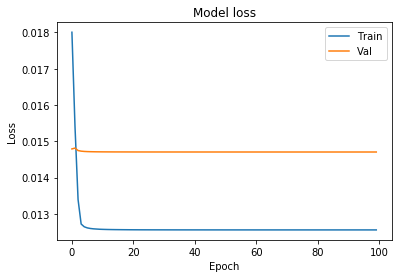

In [127]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [129]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'